# Coal Mine Roof Fall Prediction

This notebook implements machine learning models to predict coal mine roof falls based on various mine characteristics and operational parameters.

In [1]:
import pandas as pd
import numpy as np

In [2]:
mine_org=pd.read_csv("original_data.csv")
selected_columns = ["CMRR", "PRSUP", "depth_of_ cover","intersection_diagonal", "mining_hight", "roof_fall_rate","fall"]
mine= mine_org[selected_columns]

In [3]:
mine.head()

,CMRR,PRSUP,depth_of_ cover,intersection_diagonal,mining_hight,roof_fall_rate,fall
0,59,5.32,150,65.9,6.0,0.00,0
1,59,5.32,150,65.9,6.0,0.00,0
2,50,3.93,400,60.0,7.0,0.66,1
3,50,5.90,400,60.0,7.0,1.08,1
4,75,3.93,400,60.0,7.0,0.00,0


## Train Test Spliting


In [4]:
mine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CMRR                   109 non-null    int64  
 1   PRSUP                  109 non-null    float64
 2   depth_of_ cover        109 non-null    int64  
 3   intersection_diagonal  109 non-null    float64
 4   mining_hight           109 non-null    float64
 5   roof_fall_rate         109 non-null    float64
 6   fall                   109 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 6.1 KB


In [5]:
mine.describe()

,CMRR,PRSUP,depth_of_ cover,intersection_diagonal,mining_hight,roof_fall_rate,fall
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,47.724771,5.711009,448.853211,63.447706,6.307339,2.750826,0.614679
std,11.104613,2.286372,223.202318,5.607594,1.925305,5.251759,0.488919
min,28.000000,2.460000,150.000000,50.000000,3.000000,0.000000,0.000000
25%,40.000000,3.980000,300.000000,60.000000,5.000000,0.000000,0.000000
50%,45.000000,5.320000,400.000000,63.000000,6.500000,0.520000,1.000000
75%,53.000000,6.830000,500.000000,66.300000,7.500000,3.150000,1.000000
max,78.000000,14.670000,1100.000000,78.400000,10.000000,31.820000,1.000000


In [6]:
%matplotlib inline 

array([[<Axes: title={'center': 'CMRR'}>,
        <Axes: title={'center': 'PRSUP'}>,
        <Axes: title={'center': 'depth_of_ cover'}>],
       [<Axes: title={'center': 'intersection_diagonal'}>,
        <Axes: title={'center': 'mining_hight'}>,
        <Axes: title={'center': 'roof_fall_rate'}>],
       [<Axes: title={'center': 'fall'}>, <Axes: >, <Axes: >]],
      dtype=object)

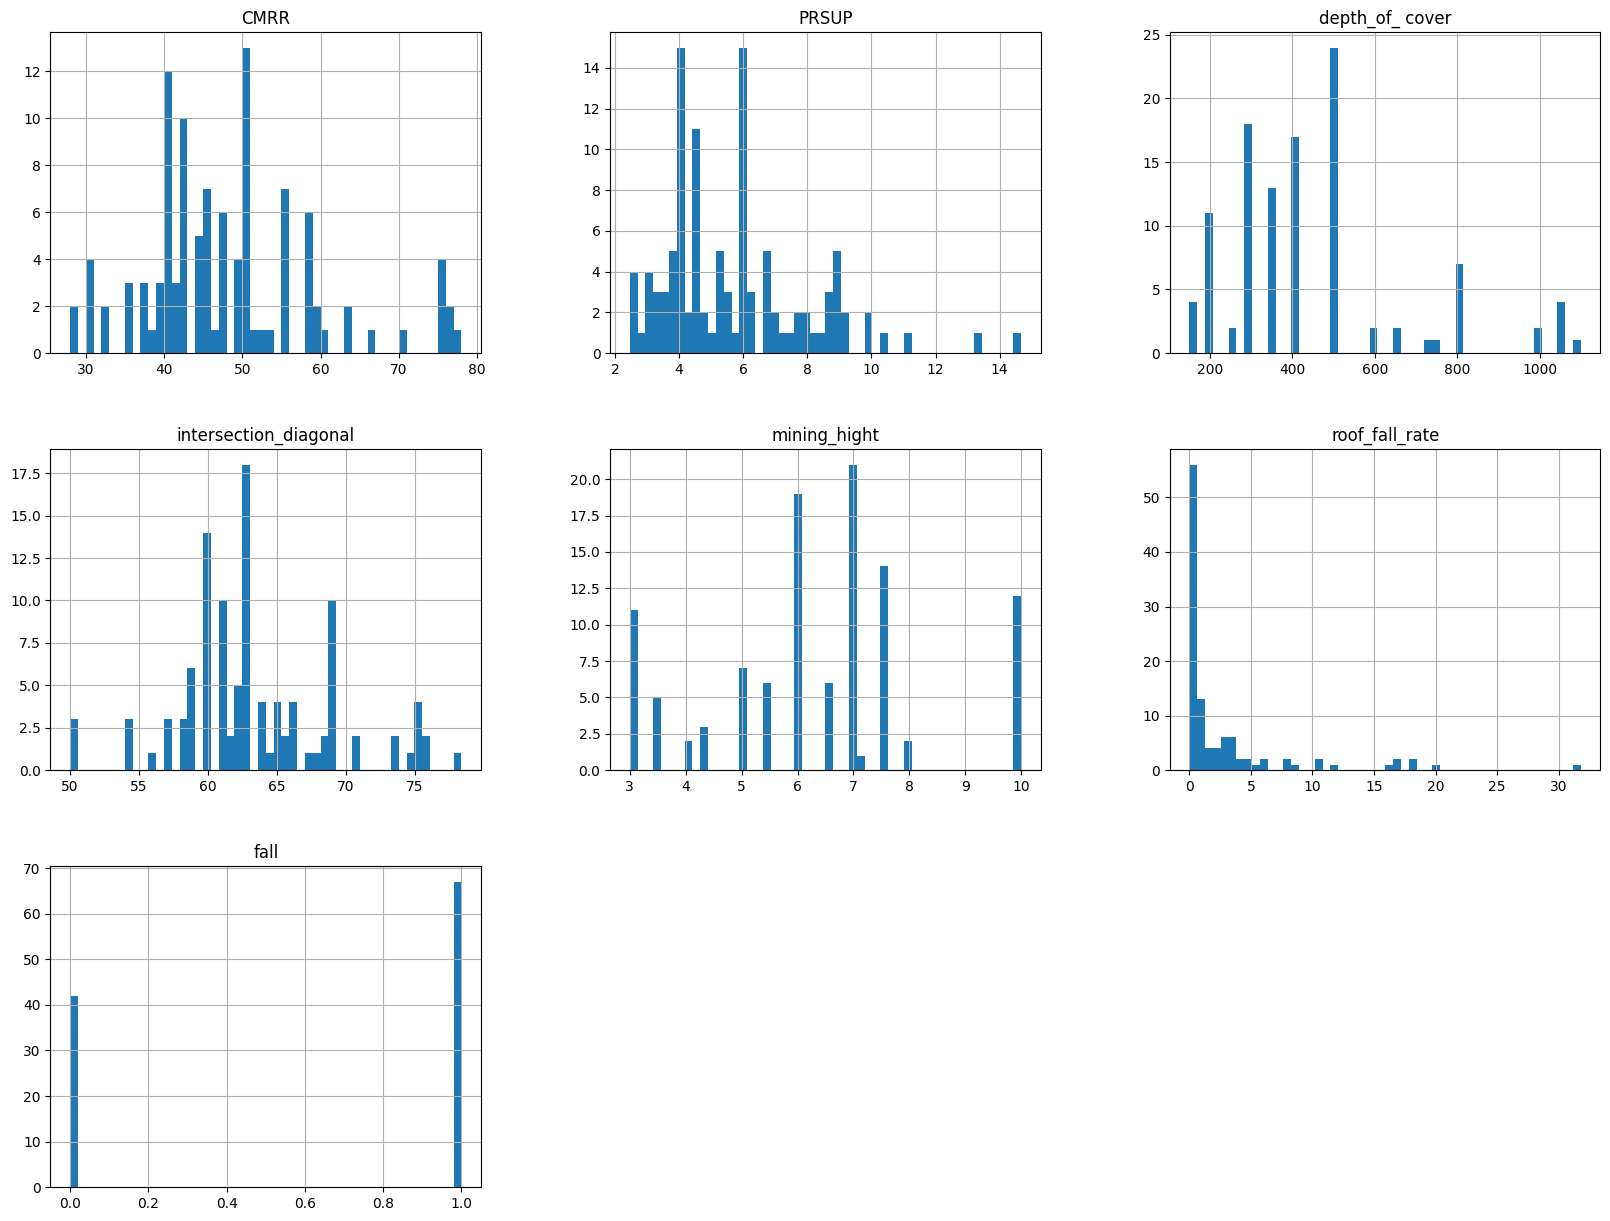

In [7]:
# for plotting histogram
import matplotlib.pyplot as plt
mine.hist(bins=50 ,figsize=(20,15))

## Train Test Splitting

In [8]:
from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(mine,test_size=0.2,random_state=42)

In [9]:
print(f"Rows in train set:{len (train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:87
Rows in test set:22



In [10]:
from sklearn.model_selection import  StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2 ,random_state=42)

for train_index ,test_index in split.split (mine,mine['fall']):
    strat_train_set=mine.loc[train_index]
    strat_test_set=mine.loc[test_index]

In [11]:
mine=strat_train_set

In [12]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 38 to 21
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CMRR                   22 non-null     int64  
 1   PRSUP                  22 non-null     float64
 2   depth_of_ cover        22 non-null     int64  
 3   intersection_diagonal  22 non-null     float64
 4   mining_hight           22 non-null     float64
 5   roof_fall_rate         22 non-null     float64
 6   fall                   22 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 1.4 KB


## Correlation Matrix and Analysis


In [13]:
corr_matrix=mine.corr()

In [14]:
corr_matrix['roof_fall_rate'].sort_values(ascending=False)

roof_fall_rate           1.000000
fall                     0.404406
PRSUP                    0.251690
mining_hight             0.062276
intersection_diagonal   -0.003951
depth_of_ cover         -0.020142
CMRR                    -0.222906
Name: roof_fall_rate, dtype: float64

array([[<Axes: xlabel='roof_fall_rate', ylabel='roof_fall_rate'>,
        <Axes: xlabel='PRSUP', ylabel='roof_fall_rate'>,
        <Axes: xlabel='CMRR', ylabel='roof_fall_rate'>,
        <Axes: xlabel='mining_hight', ylabel='roof_fall_rate'>,
        <Axes: xlabel='intersection_diagonal', ylabel='roof_fall_rate'>,
        <Axes: xlabel='depth_of_ cover', ylabel='roof_fall_rate'>],
       [<Axes: xlabel='roof_fall_rate', ylabel='PRSUP'>,
        <Axes: xlabel='PRSUP', ylabel='PRSUP'>,
        <Axes: xlabel='CMRR', ylabel='PRSUP'>,
        <Axes: xlabel='mining_hight', ylabel='PRSUP'>,
        <Axes: xlabel='intersection_diagonal', ylabel='PRSUP'>,
        <Axes: xlabel='depth_of_ cover', ylabel='PRSUP'>],
       [<Axes: xlabel='roof_fall_rate', ylabel='CMRR'>,
        <Axes: xlabel='PRSUP', ylabel='CMRR'>,
        <Axes: xlabel='CMRR', ylabel='CMRR'>,
        <Axes: xlabel='mining_hight', ylabel='CMRR'>,
        <Axes: xlabel='intersection_diagonal', ylabel='CMRR'>,
        <Axes: xlabe

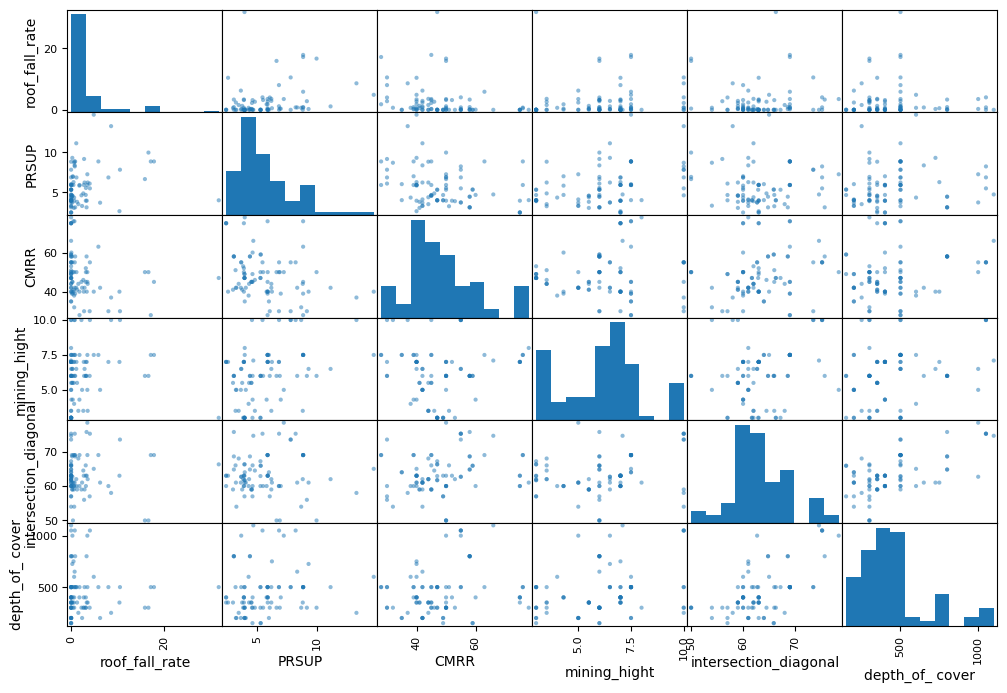

In [15]:
from  pandas.plotting import scatter_matrix
attributes=["roof_fall_rate","PRSUP","CMRR","mining_hight","intersection_diagonal","depth_of_ cover"]
scatter_matrix(mine[attributes],figsize=(12,8))

## Missing Value Imputation and Data Preprocessing

In [16]:
mine = strat_train_set.drop(["roof_fall_rate", "fall"],axis=1)
mine_labels = strat_train_set["roof_fall_rate"].copy()

In [17]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit (mine)
X=imputer.transform(mine)
mine_tr=pd.DataFrame(X,columns=mine.columns)


## scikit learn design

## creating pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scalaer',StandardScaler()),
])

In [19]:
mine_num_tr=my_pipeline.fit_transform(mine_tr)

In [20]:
mine_num_tr.shape


(87, 5)

## Model Training and Evaluation


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(mine_num_tr,mine_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
some_data = mine.iloc[:5]

In [23]:
some_labels = mine_labels.iloc[:5]

In [24]:
prepared_data = my_pipeline.transform(some_data)

In [25]:
model.predict(prepared_data)

array([ 4.9446,  1.1341,  0.0888, 13.7717,  2.8817])

In [26]:
list(some_labels)

[4.88, 0.66, 0.06, 16.67, 4.05]

## EVALUATING THE MODEL

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mine_predictions = model.predict(mine_num_tr)
mse = mean_squared_error(mine_labels,mine_predictions)
rmse = np.sqrt(mse)

In [29]:
rmse

np.float64(2.2443267982902704)

## CROSS VALIDATION

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,mine_num_tr,mine_labels,scoring ="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-scores)

In [31]:
rmse_scores

array([4.76346048, 8.59581019, 4.7331608 , 6.59251251, 5.56293988])

In [32]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean ",scores.mean())
    print("Std ",scores.std())

In [33]:
print_scores(rmse_scores)

Scores: [4.76346048 8.59581019 4.7331608  6.59251251 5.56293988]
Mean  6.049576770870244
Std  1.442355395274783


In [34]:
from joblib import dump,load
dump(model,'Mining.joblib')

['Mining.joblib']

In [35]:
x_test = strat_test_set.drop(["roof_fall_rate", "fall"],axis=1)
y_test = strat_test_set["roof_fall_rate"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(y_test))

[4.19935   1.0978    3.4272    1.75826   2.7114675 2.8304    0.9153125
 3.07905   2.7714    1.1093    1.2274    1.50191   0.1468    1.0452
 0.9886    3.3043    1.0021    0.98827   0.772495  1.67      1.43935
 2.039875 ] [12.07, 1.11, 7.69, 2.25, 4.91, 0.0, 0.0, 0.68, 2.0, 0.35, 1.08, 0.23, 0.0, 18.27, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 5.69, 0.39]


In [36]:
final_rmse

np.float64(5.918296871770407)

In [37]:
prepared_data[0]

array([-0.71268691,  3.86050692,  0.65944078,  0.28738295,  0.70728041])